# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
float_list = list(df.select_dtypes(include=['float64']).columns)
int_list = list(df.select_dtypes(include=['int64']).columns)
df[float_list] = df[float_list].fillna(value=df[float_list].mean())
df[int_list] = df[int_list].fillna(value=df[int_list].median())
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [5]:
stat = df.describe()
stat.loc['dispersion'] = stat.loc['std']**2
stat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
dispersion,11.354056,926.346983,146.321591,77.280660,7228.588766,47.267706,0.109779,138.303046,0.227483


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
# len(df[(df.Age > 50) & (df.Class == 1)])
((df.Age > 50) & (df.Class == 1)).sum()

38

__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [7]:
df.sort_values(by='Pregnancies', ascending=False)[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [8]:
# len(df[(df.Age > 30) & (df.Age < 40) & (df.Pregnancies >= 3)])
((df.Age > 30) & (df.Age < 40) & (df.Pregnancies >= 3)).sum()

115

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
# len(df[(df.BloodPressure >= 80) & (df.BloodPressure < 90)]) / len(df) * 100
((df.BloodPressure >= 80) & (df.BloodPressure < 90)).sum() / df.shape[0] * 100

18.880208333333336

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
# len(df[(df.BMI >= 30) & (df.BloodPressure > df['BloodPressure'].mean())])
((df.BMI >= 30) & (df.BloodPressure > df['BloodPressure'].mean())).sum()

274

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [11]:
df.groupby('Class').agg('mean').reset_index()[['Glucose', 'BloodPressure', 'Insulin']]
# class 0 - здоров
# class 1 - болен

,Glucose,BloodPressure,Insulin
0,110.710121,70.935397,142.210761
1,142.165573,75.147324,180.431548


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

<AxesSubplot:ylabel='Frequency'>

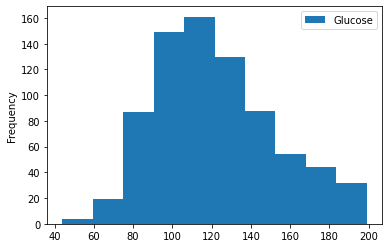

In [12]:
df[['Glucose']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

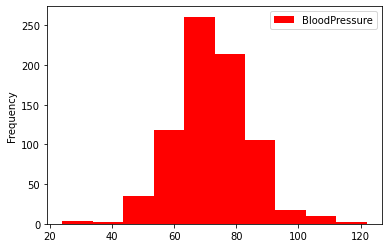

In [13]:
df[['BloodPressure']].plot.hist(color = "red")

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

In [14]:
df.groupby('Class').size().plot(kind = 'pie', title = 'Class')

NameError: name 'data' is not defined

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

In [ ]:
x = sns.distplot(df.Age, fit=norm)
plt.show()
y = sns.distplot(df.BloodPressure, fit=norm)

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

In [ ]:
df_13 = df[df.Class == 1][['Pregnancies']].value_counts().to_frame().reset_index()
df_13.rename(columns={0: 'Count'}, inplace=True)
#sns.distplot(pregn_series)
df_13
sns.set()
sns.pointplot(data=df_13, x='Pregnancies', y='Count', discrete=True)

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [ ]:
df['wasPregnant'] = (df['Pregnancies'] > 0) + 0
df

__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [ ]:
# df15 = df[['Class', 'wasPregnant']].value_counts().to_frame().reset_index()
# df15.rename(columns={0: 'Count'}, inplace=True)
df_pregn = df[df.wasPregnant == 1]
df_not_pregn = df[df.wasPregnant == 0]
pregn_ill = (df_pregn.Class == 1).sum() / len(df_pregn) * 100
not_pregn_ill = (df_not_pregn.Class == 1).sum() / len(df_not_pregn) * 100
print(f'Процент больных, которые были беременны - {pregn_ill}\n')
print(f'Процент больных, которые не были беременны - {not_pregn_ill}\n')

__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [ ]:
def groups(x):
    if x < 18.5:
        return 'Underweight'
    elif x <= 25:
        return 'Normal weight'
    elif x < 30:
        return 'Overweight'
    else:
        return 'Obesity'
    

df['bodyType'] = df['BMI'].apply(groups)
df

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [ ]:
condition = ((df.BloodPressure >= 80) &\
             (df.BloodPressure < 90) & (df.bodyType == 'Normal weight'))
df17 = df[condition]
(df17.Class == 1).sum() / df17.shape[0] * 100
